In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from modules import utils, model, metrics


In [2]:
# Default plot settings
plt.rcParams["figure.dpi"] = 300
sns.set()


In [3]:
pd.core.common.random_state(None)
seed = 42
np.random.seed(seed)

In [4]:
data = utils.get_cleaned_students_data()

In [5]:
data.head()

marital_status  application_mode  application_order  course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   daytimeevening_attendance  previous_qualification  \
0                          1                       1   
1                          1                       1   
2                          1                       1   
3                          1                       1   
4                          0                       1   

   previous_qualification_grade  nacionality  mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   fathers_qualification  ...  curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   curricular_units_2nd_sem_enrolled  curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   curricular_units_2nd_sem_approved  curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   curricular_units_2nd_sem_without_evaluations  unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   inflation_rate   gdp  target  
0             1.4  1.74       1  
1            -0.3  0.79       0  
2             1.4  1.74       1  
3            -0.8 -3.12       0  
4            -0.3  0.79       0  

[5 rows x 37 columns]

In [6]:
features = ['curricular_units_2nd_sem_approved',
  'curricular_units_2nd_sem_grade',
  'curricular_units_1st_sem_approved',
  'curricular_units_1st_sem_grade',
  'admission_grade',
  'tuition_fees_up_to_date',
 'curricular_units_2nd_sem_evaluations',
 'age_at_enrollment',
 'previous_qualification_grade',
 'curricular_units_1st_sem_evaluations',
 'course',
 'fathers_occupation',
 'mothers_occupation',
 'unemployment_rate',
 'gdp',
 'application_mode',
 'fathers_qualification',
 'curricular_units_2nd_sem_enrolled',
 'mothers_qualification',
 'inflation_rate',
 'target']

target_column = 'target'

data = data[features]

eps = 0.0001

data = data.drop(data[data["curricular_units_2nd_sem_grade"] == 0].index)

# # Separate features and target
# X = data.drop('target', axis=1)
# y = data['target']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, stratify=y)

# Stratified Test Split to make sure the target columns are distributed well in the train & test split
training_data, validation_data = \
          utils.stratified_train_test_split(data,
                                            target_column = target_column,
                                            train_size=0.5
                                            )

print(f"Data Shape: {data.shape}\nTraining Shape: {training_data.shape}\nValidation Shape: {validation_data.shape}")


# training_data = data.sample(frac = 0.5)
# validation_data = data.drop(training_data.index)



Data Shape: (3554, 21)
Training Shape: (1777, 21)
Validation Shape: (1777, 21)


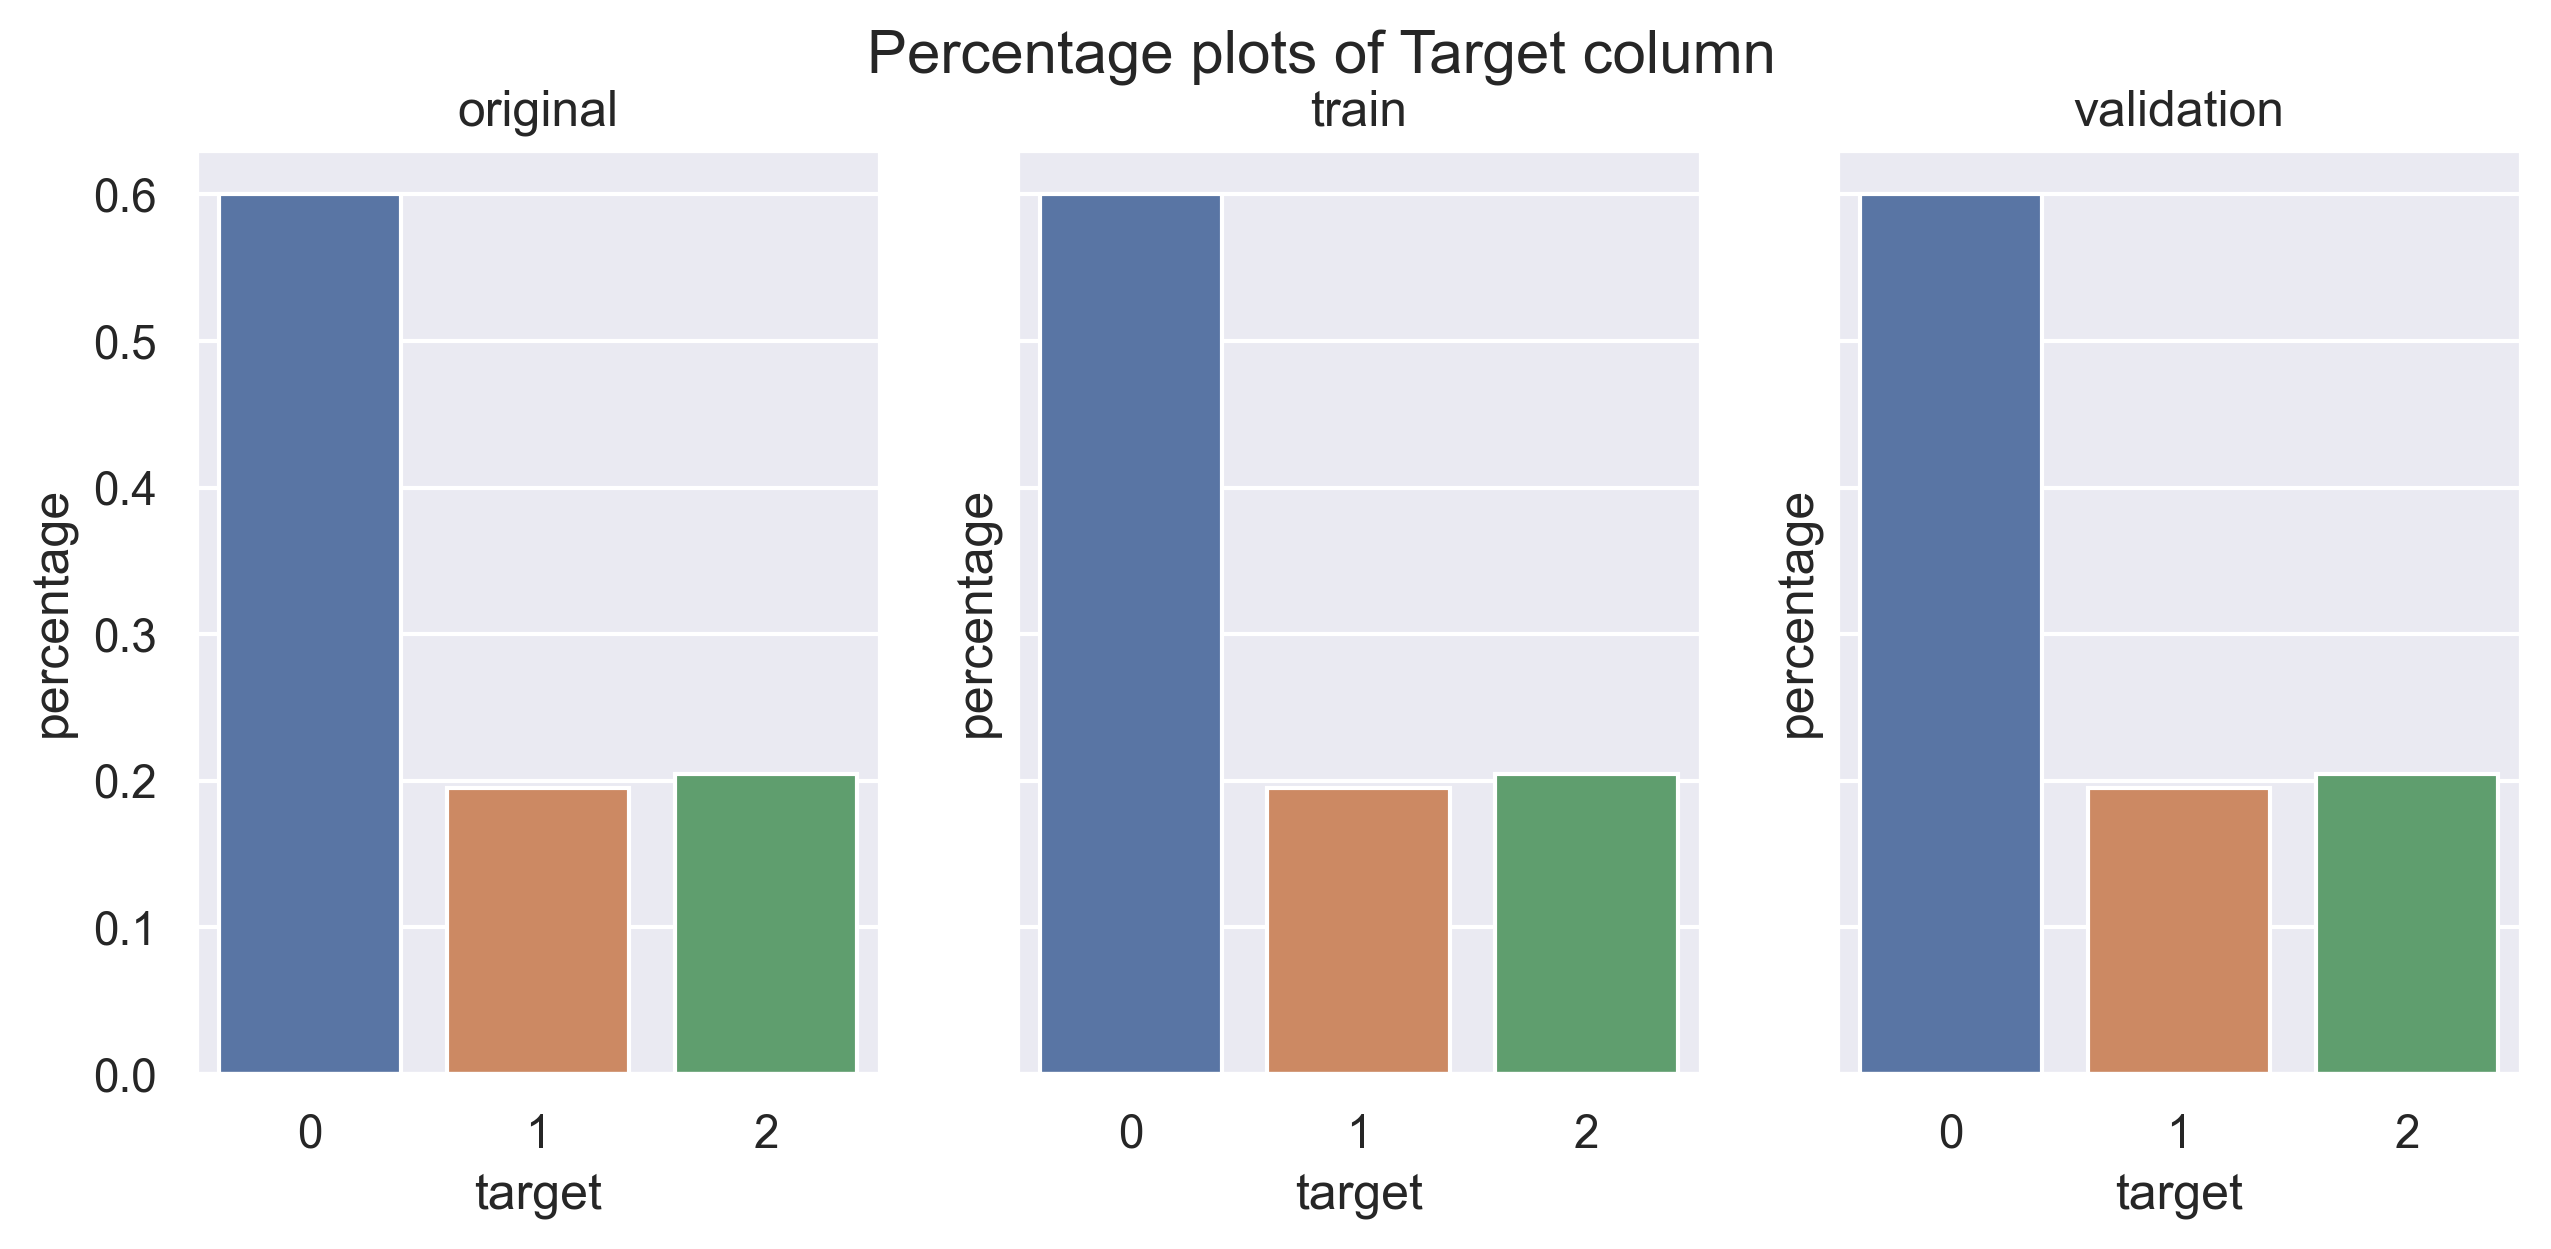

In [8]:
fig, ax = plt.subplots(1,3, figsize=(10,4), sharex=True, sharey=True)
orig_label = data[target_column].value_counts(normalize = True).reset_index().rename(columns = {"index": "target", "target":"percentage"})
tr_label = training_data[target_column].value_counts(normalize = True).reset_index().rename(columns = {"index": "target", "target":"percentage"})
val_label = validation_data[target_column].value_counts(normalize = True).reset_index().rename(columns = {"index": "target", "target":"percentage"})
sns.barplot(data = orig_label, x = "target", y = "percentage", ax = ax[0])
ax[0].set_title("original")
sns.barplot(data = tr_label, x = "target", y = "percentage",  ax = ax[1], label = "train")
ax[1].set_title("train")
sns.barplot(data = val_label, x = "target", y = "percentage", ax = ax[2], label = "validation")
ax[2].set_title("validation")
plt.suptitle("Percentage plots of Target column")
plt.show()

In [10]:
# def sturges_bin_size(data):
#     n = len(data)
#     k = int(np.ceil(np.log2(n) + 1))
#     return k



In [12]:
bins = [20, 8, 18, 10, 25, 4, 15, 22, 30, 20, 5, 6, 6, 12, 10, 15, 12, 16, 12, 15, 5]

nogan = model.NoGANSynth(data = training_data,
                   bins = bins
                   )
nogan.create_bin_keys()

In [13]:
# Synthesize Data
n_synth_rows = len(validation_data)
synth_data = nogan.generate_synthetic_data(n_synth_rows)

# Convert columns to integer data type
int_columns = training_data.select_dtypes(include=['int']).columns
for col in int_columns:
    synth_data[col] = synth_data[col].astype(int)

print(synth_data)
    


      curricular_units_2nd_sem_approved  curricular_units_2nd_sem_grade  \
0                                     1                       10.912646   
1                                     1                       10.114732   
2                                     1                       11.063438   
3                                     1                       10.507251   
4                                     1                       10.542338   
...                                 ...                             ...   
1772                                 14                       16.381919   
1773                                 13                       17.119491   
1774                                 17                       16.031009   
1775                                 14                       17.722532   
1776                                  9                       16.779176   

      curricular_units_1st_sem_approved  curricular_units_1st_sem_grade  \
0                       

In [14]:
# Evaluate the generated synthetic with validation data
nogan.evaluate(training_data, validation_data,synth_data)

Sampling ecdf, location = 0, adjusted = False
Sampling ecdf, location = 100, adjusted = False
Sampling ecdf, location = 200, adjusted = False
Sampling ecdf, location = 300, adjusted = False
Sampling ecdf, location = 400, adjusted = False
Sampling ecdf, location = 500, adjusted = False
Sampling ecdf, location = 600, adjusted = False
Sampling ecdf, location = 700, adjusted = False
Sampling ecdf, location = 800, adjusted = False
Sampling ecdf, location = 900, adjusted = False
ECDF Kolmogorof-Smirnov dist. (synth. vs valid.): 0.0039
Base ECDF Kolmogorof-Smirnov dist. (train. vs valid.): 0.0028


In [15]:
# from scipy.stats import ks_2samp


# np.random.seed(42)

# # Define the number of permutations for resampling
# num_permutations = 1000

# # Initialize an array to store permutation KS statistics for each feature
# permuted_ks_stats = {col: [] for col in validation_data.columns}

# # Perform permutation testing
# for _ in range(num_permutations):
#     combined_data = pd.concat([validation_data, synth_data])
#     combined_data_shuffled = combined_data.sample(frac=1, replace=False, random_state=None)
    
#     shuffled_data1 = combined_data_shuffled.iloc[:len(validation_data)]
#     shuffled_data2 = combined_data_shuffled.iloc[len(synth_data):]
    
#     for col in validation_data.columns:
#         permuted_ks_statistic, _ = ks_2samp(shuffled_data1[col], shuffled_data2[col])
#         permuted_ks_stats[col].append(permuted_ks_statistic)

# # Calculate the observed KS statistics for each feature
# observed_ks_stats = {col: ks_2samp(validation_data[col], synth_data[col])[0] for col in validation_data.columns}

# # Calculate p-values for each feature based on the permutation results
# p_values = {col: (np.sum(np.array(permuted_ks_stats[col]) >= observed_ks_stats[col]) + 1) / (num_permutations + 1) for col in validation_data.columns}

# # Define the significance level
# alpha = 0.05

# # Check if any of the p-values are less than the significance level to reject the null hypothesis
# features_different = [col for col in p_values if p_values[col] < alpha]

# if features_different:
#     print(f"Null hypothesis rejected for features: {', '.join(features_different)}.")
# else:
#     print("Null hypothesis not rejected. Distributions are not significantly different for any features.")

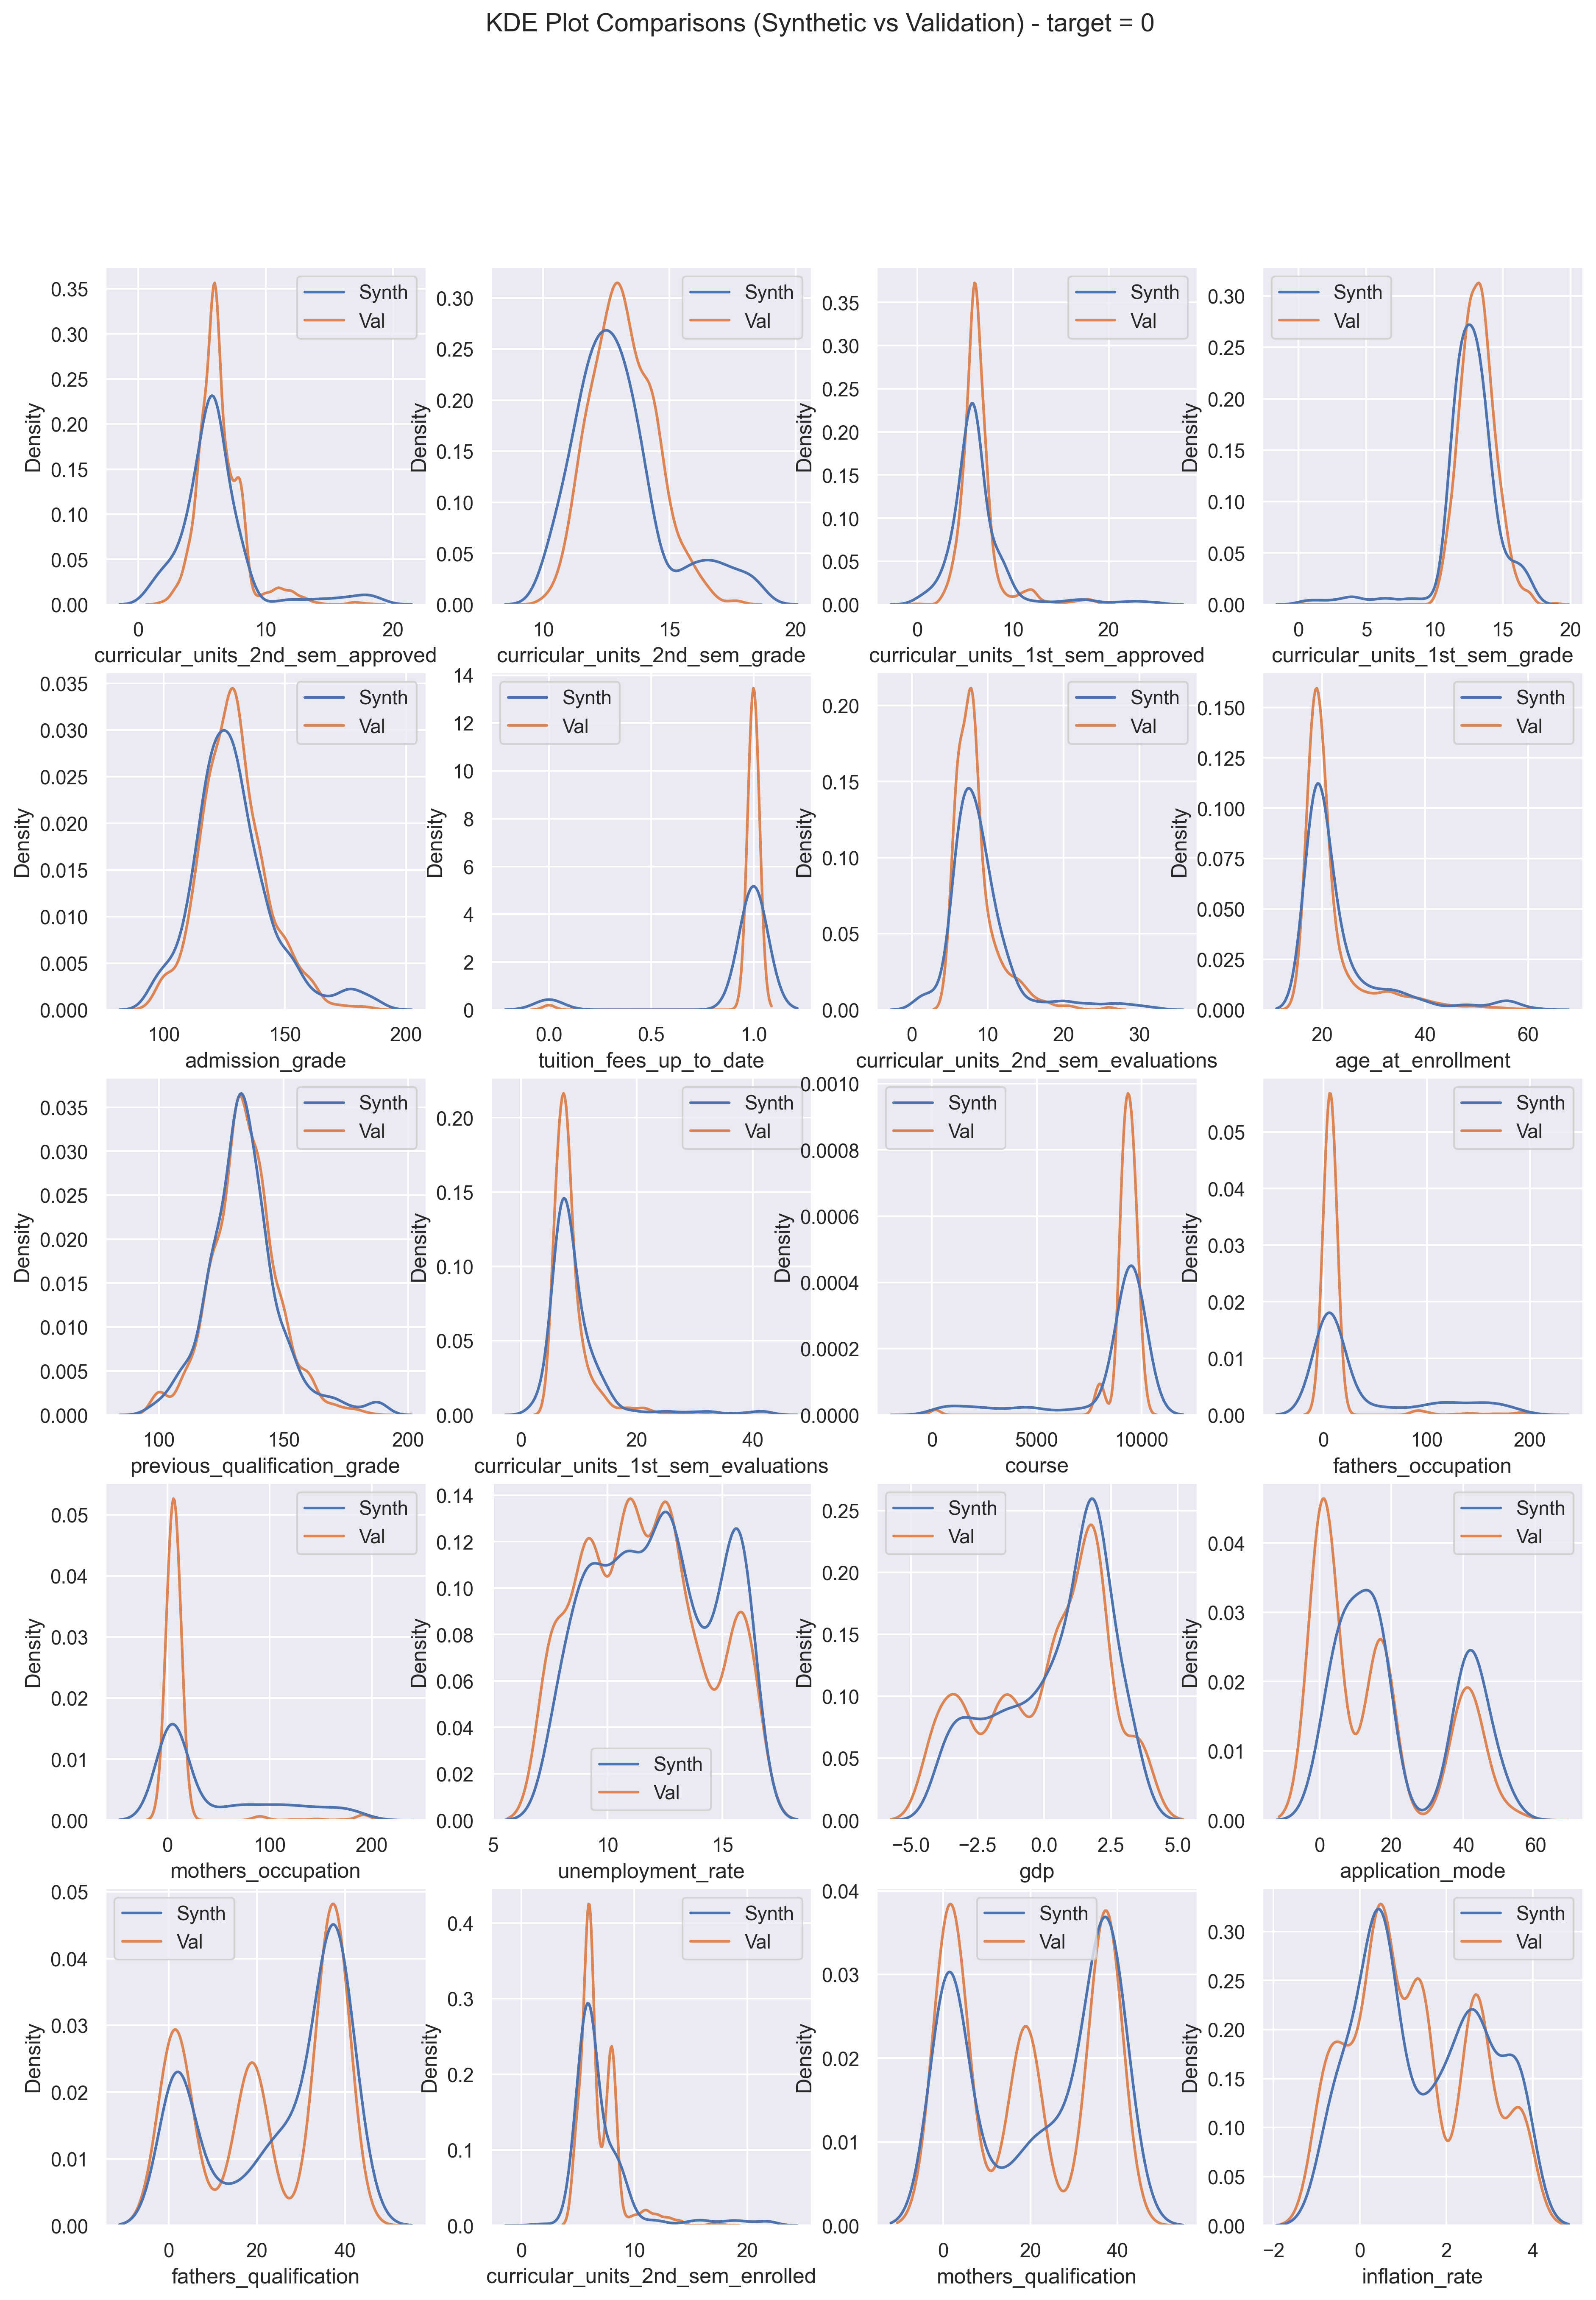

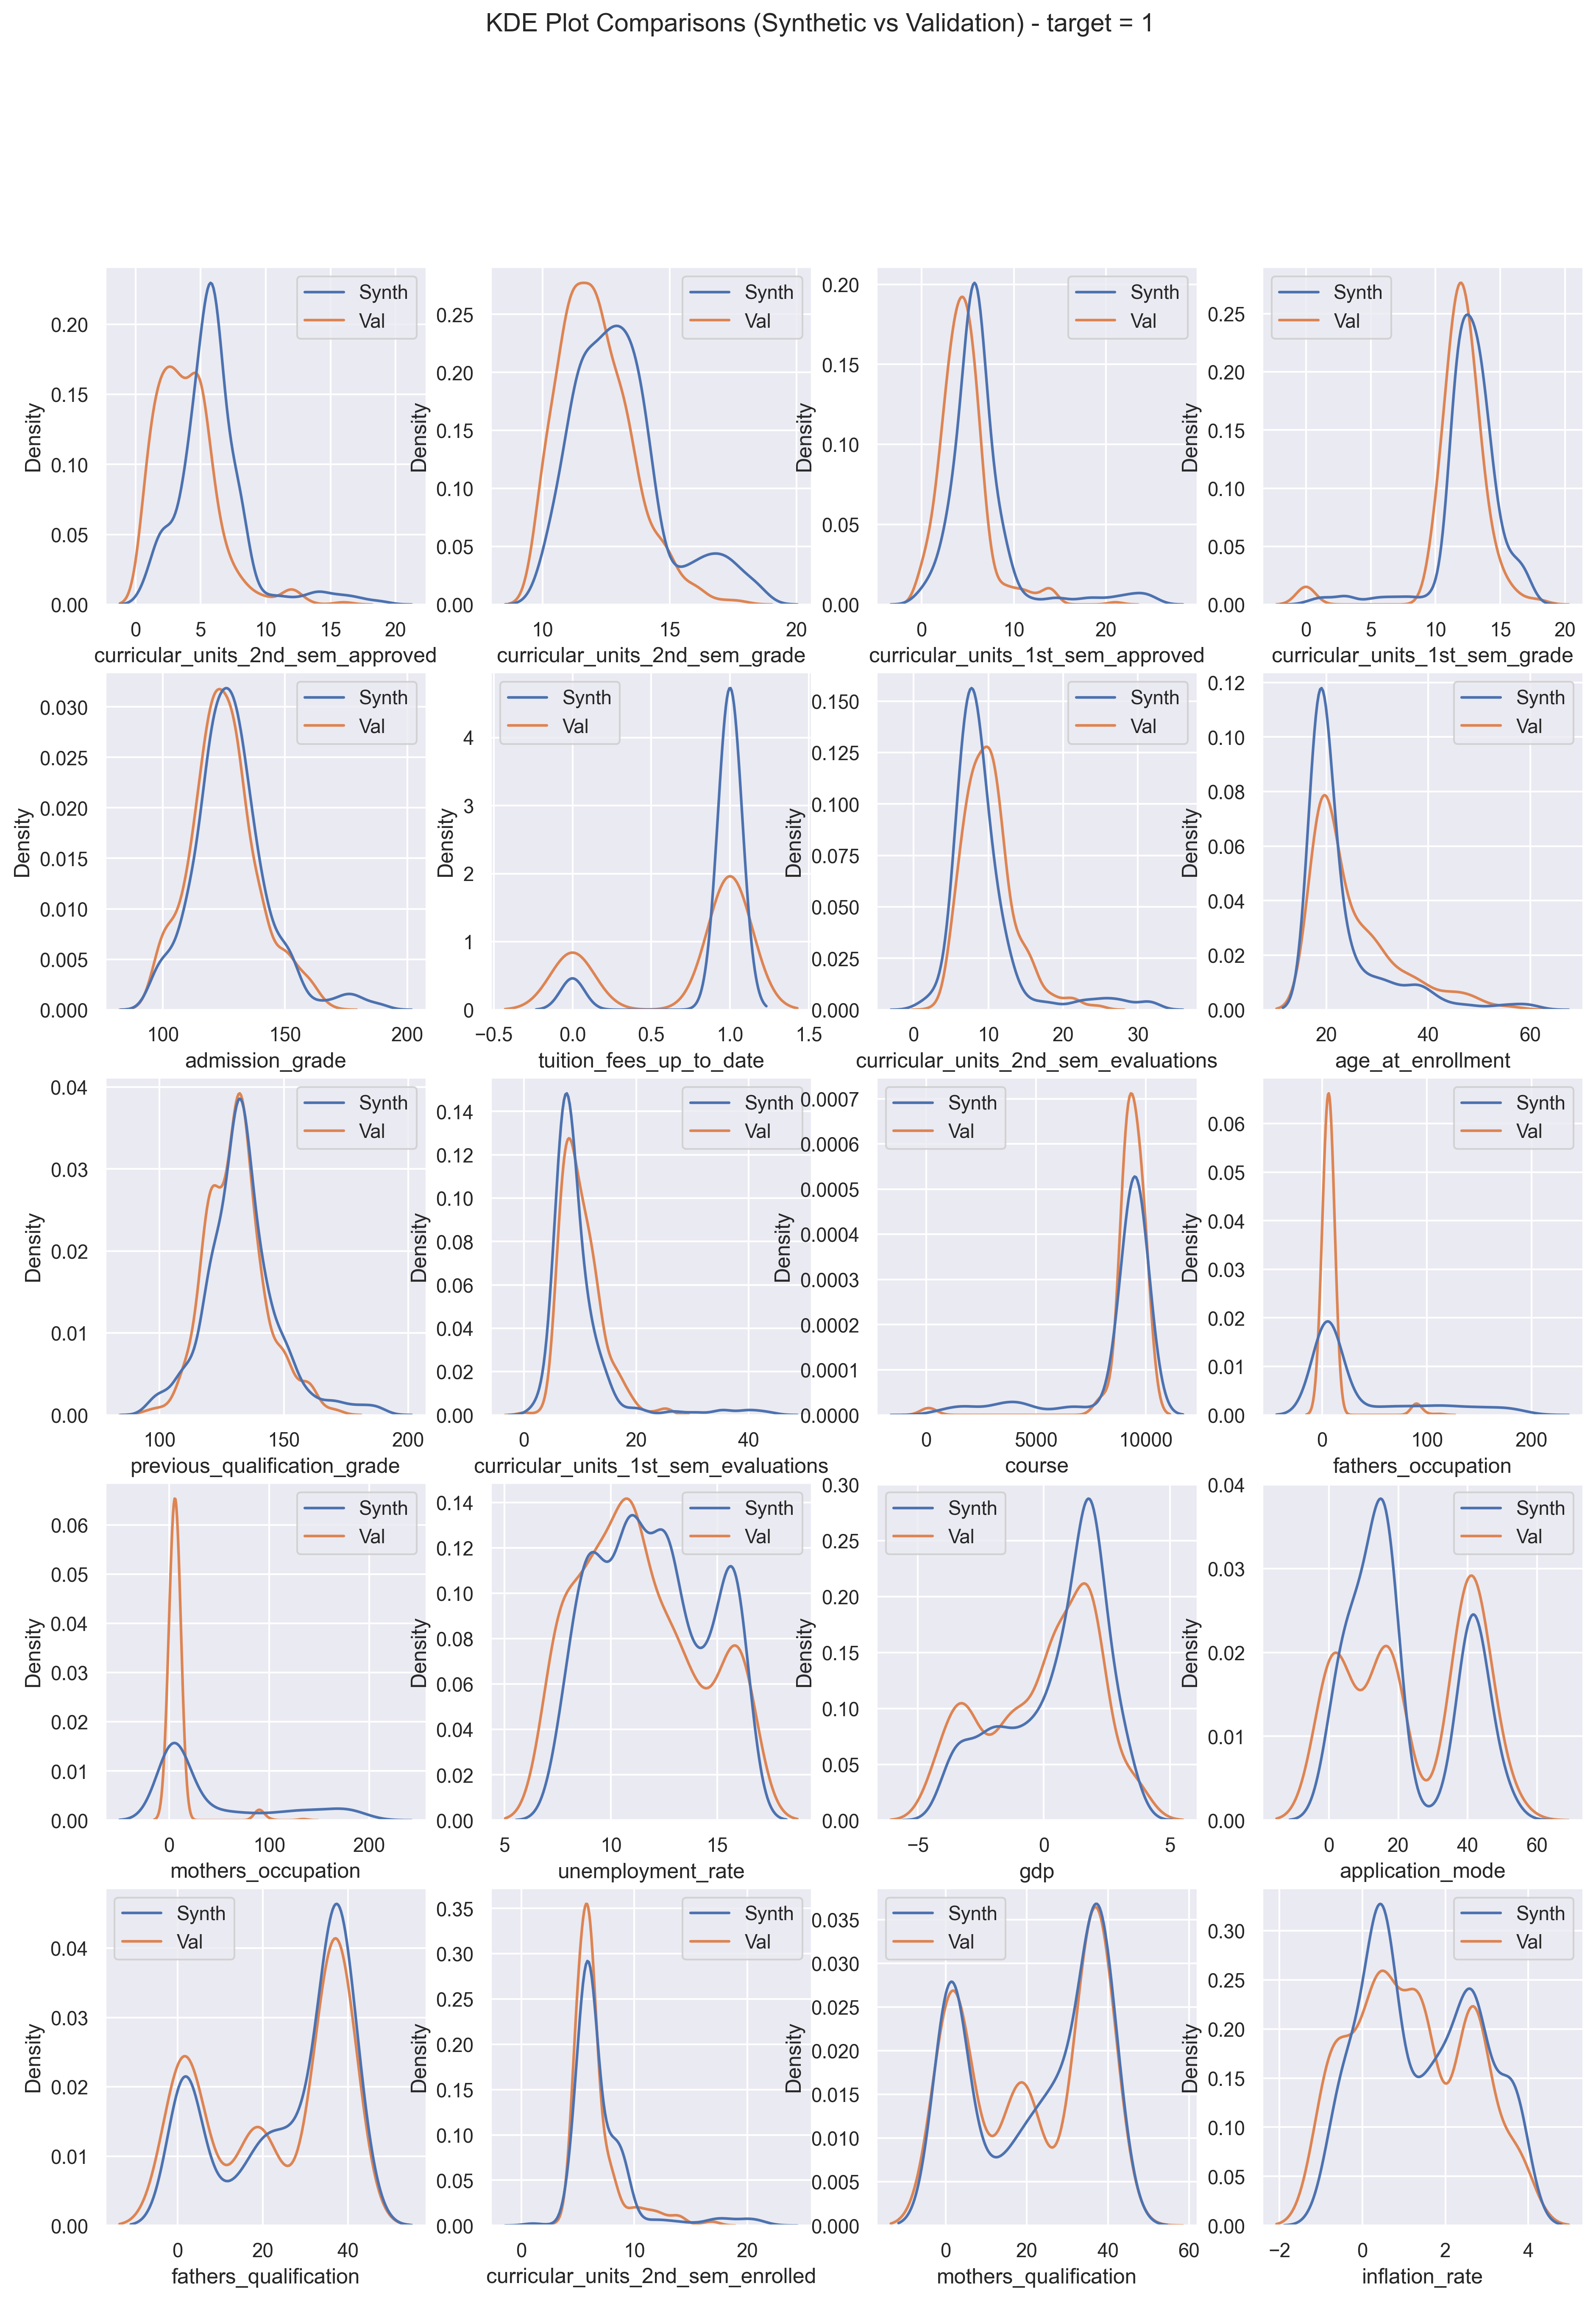

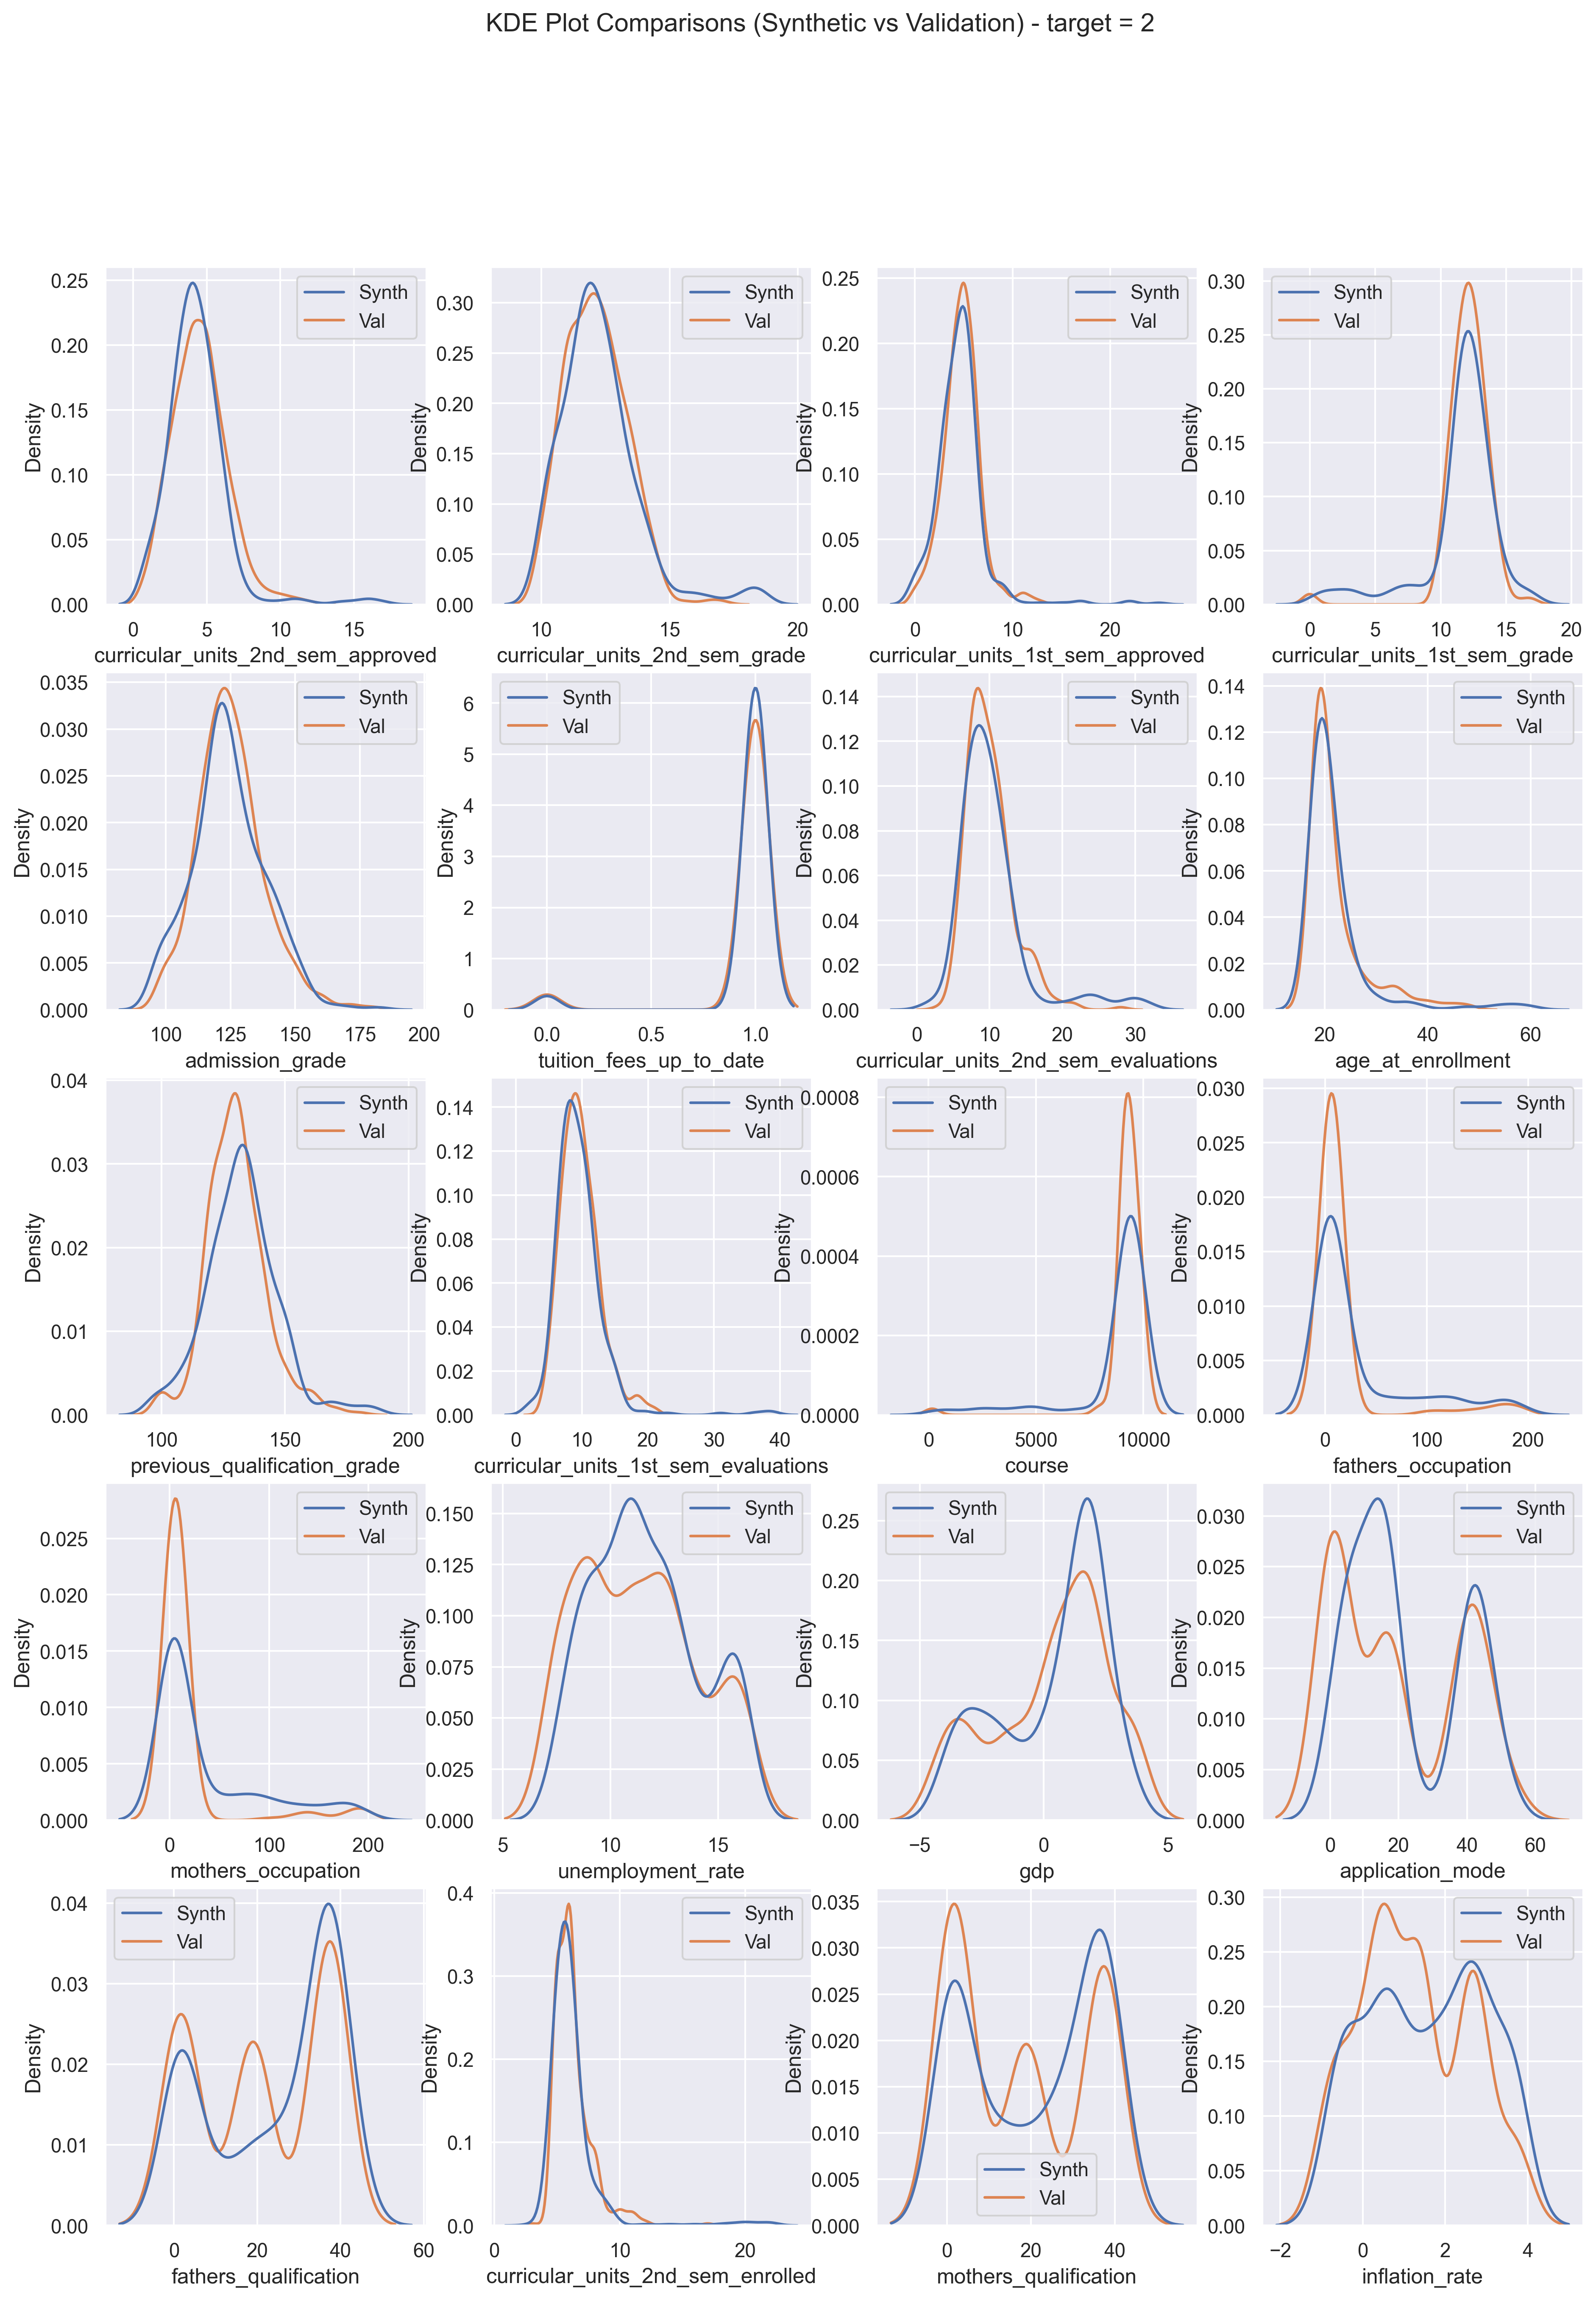

In [16]:
features = list(synth_data.columns)
features.remove("target")
utils.plot_density_comparison(synth_data.query("target == 0"), 
                                validation_data.query("target == 0"), 
                                df_a_name = "Synth",
                                df_b_name = "Val",
                                features = features, 
                                title = "KDE Plot Comparisons (Synthetic vs Validation) - target = 0")

utils.plot_density_comparison(synth_data.query("target == 1"), 
                                validation_data.query("target == 1"), 
                                df_a_name = "Synth",
                                df_b_name = "Val",                                
                                features = features, 
                                title = "KDE Plot Comparisons (Synthetic vs Validation) - target = 1")

utils.plot_density_comparison(synth_data.query("target == 2"), 
                                validation_data.query("target == 2"), 
                                df_a_name = "Synth",
                                df_b_name = "Val",                                
                                features = features, 
                                title = "KDE Plot Comparisons (Synthetic vs Validation) - target = 2")

#### Observations
* NaNs, empty text, and 0 values need to be cleaned in the dataset, else the NoGAN Synthesizer will not converge
* While the KS Stat value for Synthetic Data vs Validation data is a very small value, the individual distributions may differ considerably for each column. Need to test if tuned "bins" hyperparameter will help improve that.

In [19]:
#features.remove("target")

# target = 0

# dfs = synth_data.query("target == 0")
# dfv = validation_data.query("target == 0")

# labels = ['A'] * len(dfs) + ['B'] * len(dfv)

# combined_data = pd.concat([dfs['curricular_units_2nd_sem_grade'], dfv['curricular_units_2nd_sem_grade']])

# combined_df = pd.DataFrame({'curricular_units_2nd_sem_grade': combined_data, 'Data': labels})

# sns.displot(data=combined_df, 
#             x="curricular_units_2nd_sem_grade", 
#             kind="kde", hue = labels, common_norm=False)


# # target = 0
# utils.plot_histogram_comparison(synth_data.query("target == 0"), 
#                                 validation_data.query("target == 0"), 
#                                 features, 
#                                 title = "Histogram Comparisons (Synthetic vs Validation) - target = 0") 

# utils.plot_scatter_comparison(synth_data.query("target == 0"), 
#                               validation_data.query("target == 0"), 
#                               features, 
#                               title = "Scatter Plot Comparisons (Synthetic vs Validation) - target = 0 ")    

# # target = 1
# utils.plot_histogram_comparison(synth_data.query("target == 1"), 
#                                 validation_data.query("target == 1"), 
#                                 features, 
#                                 title = "Histogram Comparisons (Synthetic vs Validation) - target = 1") 

# utils.plot_scatter_comparison(synth_data.query("target == 1"), 
#                               validation_data.query("target == 1"), 
#                               features, 
#                               title = "Scatter Plot Comparisons (Synthetic vs Validation) - target = 1 ")  

# # target = 2
# utils.plot_histogram_comparison(synth_data.query("target == 2"), 
#                                 validation_data.query("target == 2"), 
#                                 features, 
#                                 title = "Histogram Comparisons (Synthetic vs Validation) - target = 2") 

# utils.plot_scatter_comparison(synth_data.query("target == 2"), 
#                               validation_data.query("target == 2"), 
#                               features, 
#                               title = "Scatter Plot Comparisons (Synthetic vs Validation) - target = 2 ")  